<a href="https://colab.research.google.com/github/subhadeep-123/MNIST-Handwritten-Character-Detection/blob/master/MNIST_using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing The Packages
import torch
from torch import optim
from torch import nn
import torch.nn.functional as F
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import helper
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [11]:
#Normalizing The Dataset
transformed = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.5,), (0.5,)),
                                 ])

#Downloading The Dataset
trainset = dataset.MNIST('MNIST_NEW',
                        download = True,
                        train = True,
                        transform = transformed)

#Setting up the batch size
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size = 64,
                                          shuffle = True)

0it [00:00, ?it/s]

9920512it [00:02, 3862315.77it/s]                             


Extracting MNIST_NEW/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 56696.62it/s]                           
0it [00:00, ?it/s]

Extracting MNIST_NEW/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:01, 951007.82it/s]                             
0it [00:00, ?it/s]

Extracting MNIST_NEW/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 21312.91it/s]            

Extracting MNIST_NEW/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [12]:
#Spliting The Dataset
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


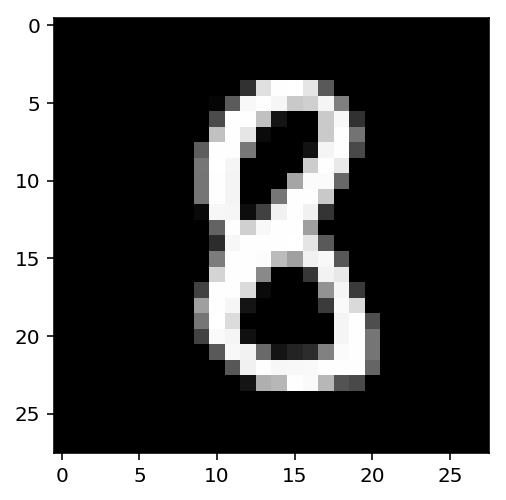

In [19]:
#Plotting a Visualization
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')

In [0]:
#Defining The Networks Architecture
class Neural_Network(nn.Module):
  
  def __init__(self):
    super().__init__()
    
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)
    
  def forward(self, x):
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x), dim = 1)
    
    return x

In [38]:
#Printing the Architecture of the Network
model = Neural_Network()
model

Neural_Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [0]:
#Defining the Criterion
criterion = nn.NLLLoss()

#Defining the Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [41]:
#Training the Network
epoch = 5

for x in range(epoch):
  running_loss = 0
  
  #looping through the dataset
  for images, labels in trainloader:
    
    #Flattening The Image
    images = images.view(images.shape[0], -1)
    
    #Clearing Previous Gradients
    optimizer.zero_grad()
    
    #-> Forward Pass 
    #-> Calculating Loss 
    #-> Calculating Gradients Through Backward Pass
    #-> Updating the Weights, using optimizer.step()
    
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    
    #Appending the new loss
    running_loss += loss.item()
    
  else:
    print(f"Training Loss: {running_loss/len(trainloader)}")
    

Training Loss: 2.2044236544352858
Training Loss: 1.4961222967486392
Training Loss: 0.7811902038324108
Training Loss: 0.5425858480780363
Training Loss: 0.44764498217718435


In [0]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

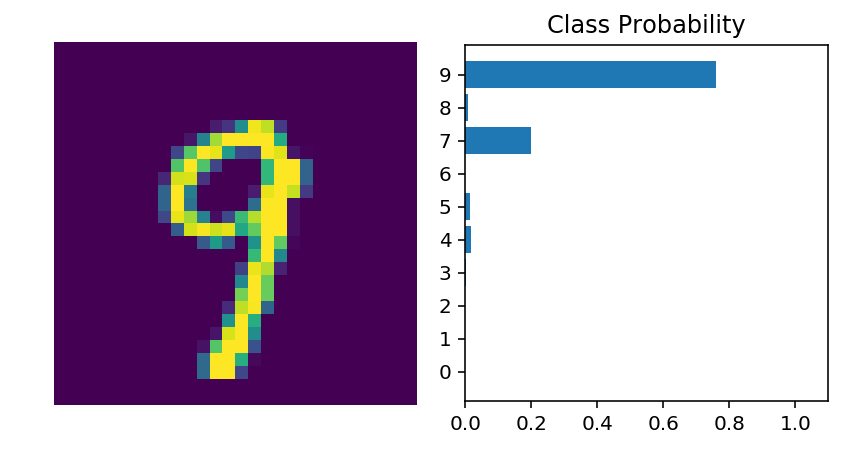

In [43]:
#Checking our model

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)

# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)